In [349]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [350]:
df= pd.read_csv(r"C:\Users\navde\Downloads\Lab3_data_mod2.csv")

In [351]:
df.head(20)

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19.0,15000.0,39
1,2,Male,21.0,15000.0,81
2,3,Female,20.0,16000.0,6
3,4,Female,23.0,16000.0,77
4,5,Female,31.0,17000.0,40
5,6,Female,22.0,17000.0,76
6,7,Female,35.0,18000.0,6
7,8,Female,23.0,18000.0,94
8,9,Male,64.0,19000.0,3
9,10,Female,30.0,19000.0,72


In [352]:
df.describe()

,CustomerID,Age,Income,Spending Score
count,200.000000,197.000000,197.000000,200.000000
mean,100.500000,39.142132,61670.065990,50.200000
std,57.879185,14.412300,27733.398489,25.823522
min,1.000000,18.000000,15000.000000,1.000000
25%,50.750000,28.000000,42000.000000,34.750000
50%,100.500000,36.000000,62000.000000,50.000000
75%,150.250000,49.000000,78000.000000,73.000000
max,200.000000,85.000000,150753.000000,99.000000


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   Gender          200 non-null    object 
 2   Age             197 non-null    float64
 3   Income          197 non-null    float64
 4   Spending Score  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


# Create plots to understand the distribution of the each feature in the data
# Create plots to understand the distribution of data with respect to the other features


In [354]:
#checking for null values in the data
df.isnull().sum()

CustomerID        0
Gender            0
Age               3
Income            3
Spending Score    0
dtype: int64

<Axes: xlabel='count', ylabel='Gender'>

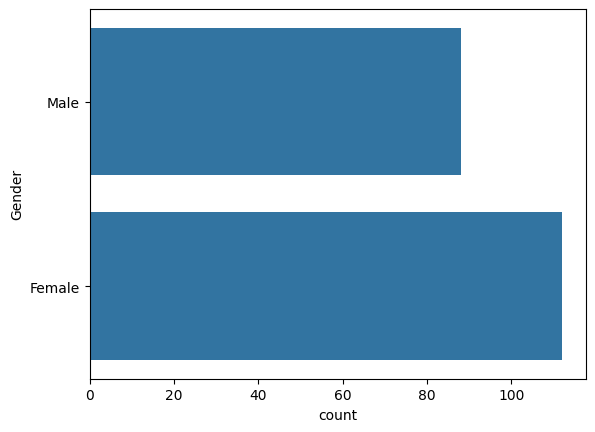

In [355]:
sns.countplot(df['Gender'])

<Axes: xlabel='Spending Score', ylabel='Income'>

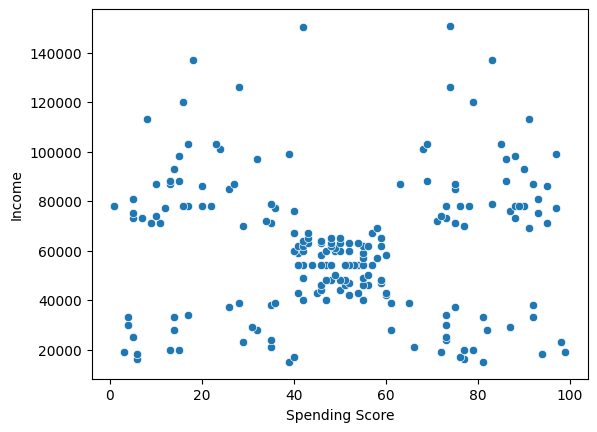

In [356]:
sns.scatterplot(x='Spending Score', y='Income', data=df)

<Axes: xlabel='Age', ylabel='Spending Score'>

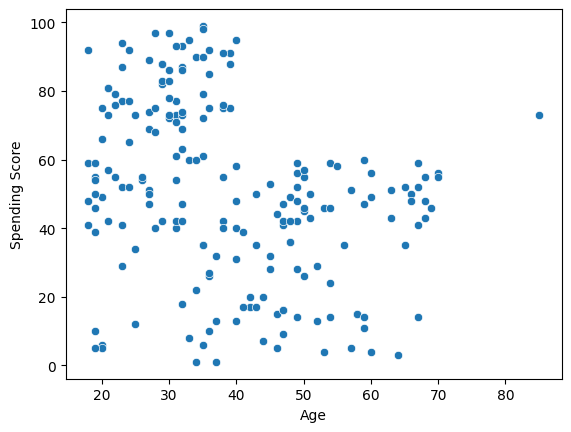

In [357]:
sns.scatterplot(x='Age', y='Spending Score', data=df)

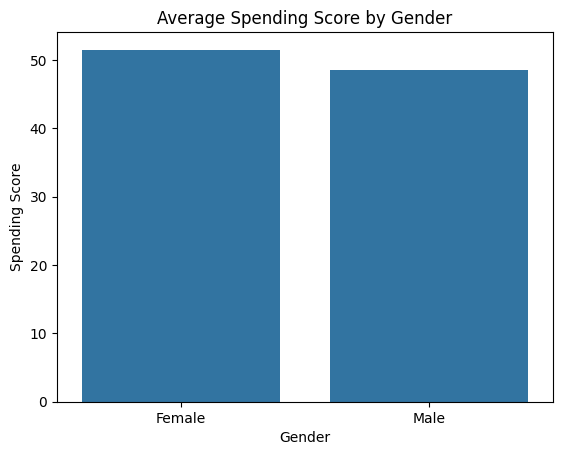

In [358]:
# Calculate the average spending score for each gender
average_spending = df.groupby('Gender')['Spending Score'].mean().reset_index()

sns.barplot(x='Gender', y='Spending Score', data=average_spending)

plt.title('Average Spending Score by Gender')
plt.show()

Text(0.5, 1.0, 'Distribution of Age')

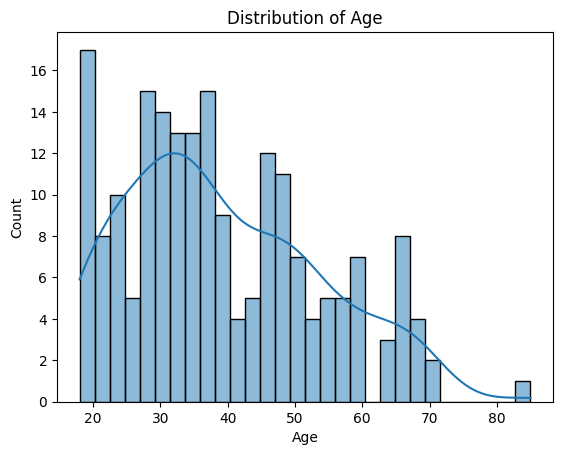

In [359]:

sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')


Text(0.5, 1.0, 'Distribution of Annual Income')

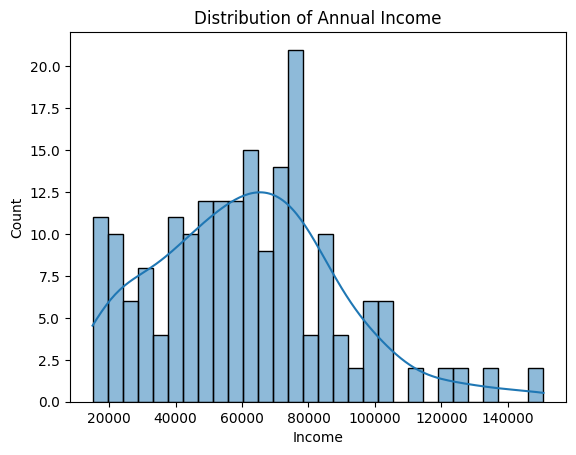

In [360]:

sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Distribution of Annual Income')

Text(0.5, 1.0, 'Distribution of Spending Score')

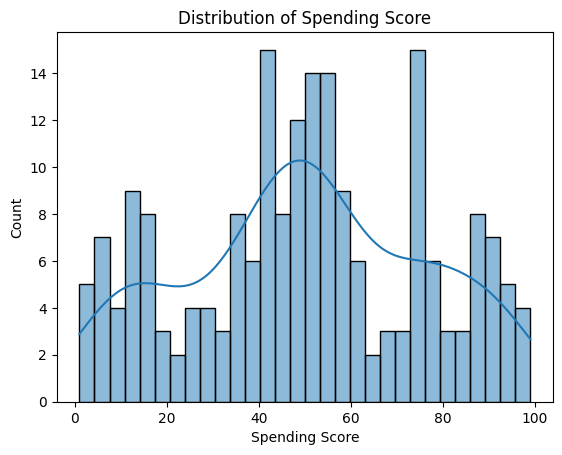

In [361]:
sns.histplot(df['Spending Score'], bins=30, kde=True)
plt.title('Distribution of Spending Score')

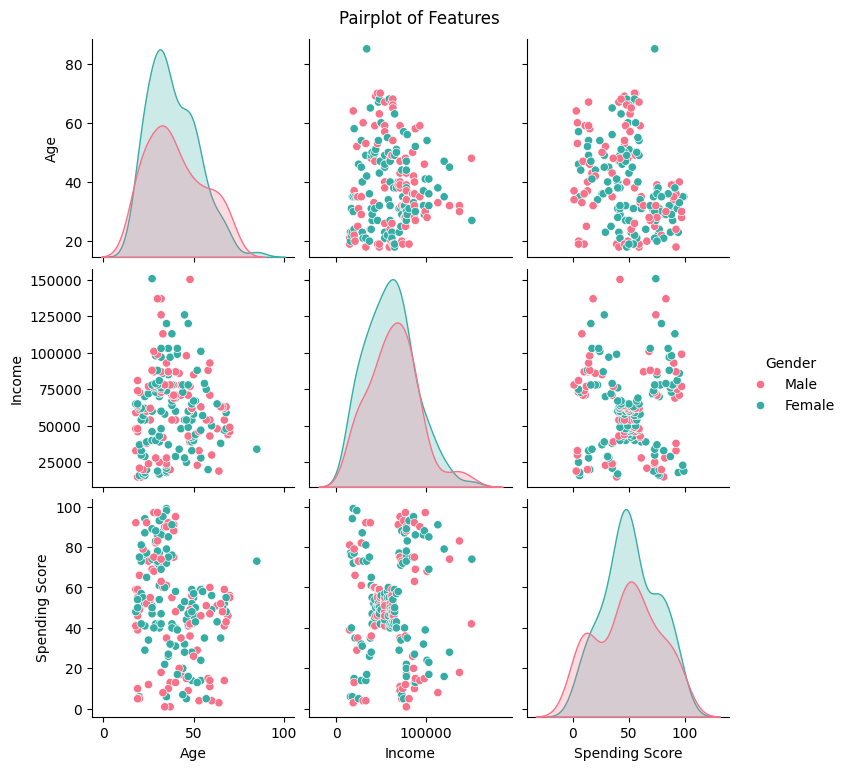

In [362]:
pairplot_columns = ['Age', 'Income', 'Spending Score', 'Gender']
sns.pairplot(df[pairplot_columns], hue='Gender', palette='husl')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

#	Filling missing values in the data
#	Identify any outliers
#	feature scaling 
#	Encode categorical features into numerical data


In [363]:
#rows with all the nan values

nan_rows = df[df.isnull().any(axis=1)]
nan_rows

,CustomerID,Gender,Age,Income,Spending Score
10,11,Male,67.0,NaN,14
49,50,Female,31.0,NaN,42
85,86,Male,NaN,54000.0,46
120,121,Male,NaN,NaN,56
190,191,Female,NaN,103000.0,23


<Axes: xlabel='Income'>

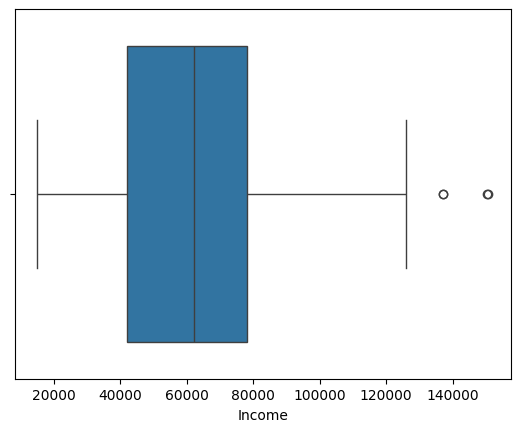

In [364]:

sns.boxplot(x='Income', data=df)

<Axes: xlabel='Spending Score'>

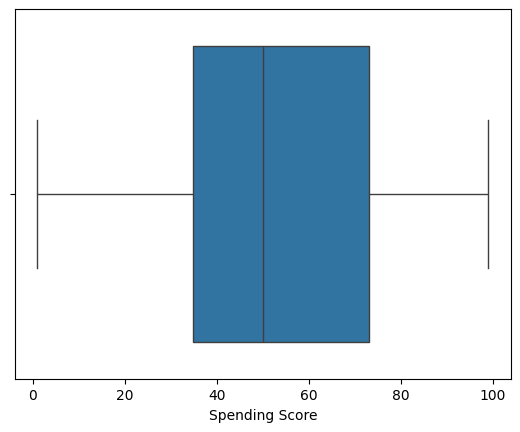

In [365]:

sns.boxplot(x='Spending Score', data=df)

<Axes: xlabel='Age'>

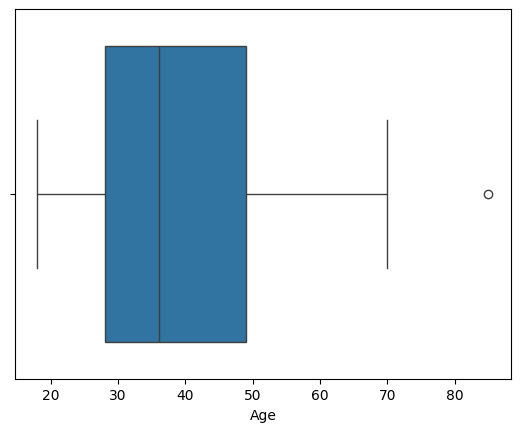

In [366]:

sns.boxplot(x='Age', data=df)

In [367]:

Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers
outlier_mask = (df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))

outliers_income= df[outlier_mask]
outliers_income

,CustomerID,Gender,Age,Income,Spending Score
98,99,Male,48.0,150250.0,42
147,148,Female,27.0,150753.0,74
198,199,Male,32.0,137000.0,18
199,200,Male,30.0,137000.0,83


In [368]:

# Remove outliers from the DataFrame
df = df[~outlier_mask]

In [369]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers
outlier_mask = (df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))

outliers_age= df[outlier_mask]
outliers_age

,CustomerID,Gender,Age,Income,Spending Score
37,38,Female,85.0,34000.0,73


In [370]:

# Remove outliers from the DataFrame
df = df[~outlier_mask]

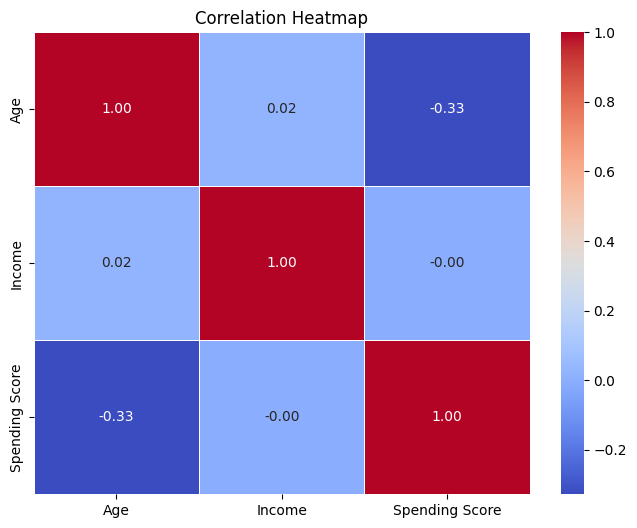

In [371]:
selected_columns = ['Age', 'Income', 'Spending Score']

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [372]:
# Calculate gender-specific mean for numerical columns
gender_means = df_clean.groupby('Gender').transform('mean')

# Fill missing values based on gender-specific mean
df_clean_filled = df_clean.copy()
df_clean_filled[['Age', 'Income']] = df_clean_filled[['Age', 'Income']].fillna(gender_means)


In [373]:
df_clean_filled

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19.0,15000.0,39
1,2,Male,21.0,15000.0,81
2,3,Female,20.0,16000.0,6
3,4,Female,23.0,16000.0,77
4,5,Female,31.0,17000.0,40
...,...,...,...,...,...
195,196,Female,35.0,120000.0,79
196,197,Female,45.0,126000.0,28
197,198,Male,32.0,126000.0,74
198,199,Male,32.0,137000.0,18


In [374]:
# Assuming a simple approach: use Min-Max normalization for numerical features
numerical_columns = ['Age', 'Income', 'Spending Score']

scaler = MinMaxScaler()
df_clean_copy = df_clean_filled.copy()  # Create a copy

# Apply Min-Max scaling to numerical columns
df_clean_copy[numerical_columns] = scaler.fit_transform(df_clean_copy[numerical_columns])

# Encode categorical features into numerical data using Label Encoder for 'Gender'
label_encoder = LabelEncoder()
df_clean_copy['Gender'] = label_encoder.fit_transform(df_clean_copy['Gender'])
df_clean_copy

,CustomerID,Gender,Age,Income,Spending Score
0,1,1,0.019231,0.000000,0.387755
1,2,1,0.057692,0.000000,0.816327
2,3,0,0.038462,0.007366,0.051020
3,4,0,0.096154,0.007366,0.775510
4,5,0,0.250000,0.014733,0.397959
...,...,...,...,...,...
195,196,0,0.326923,0.773464,0.795918
196,197,0,0.519231,0.817661,0.275510
197,198,1,0.269231,0.817661,0.744898
198,199,1,0.269231,0.898691,0.173469


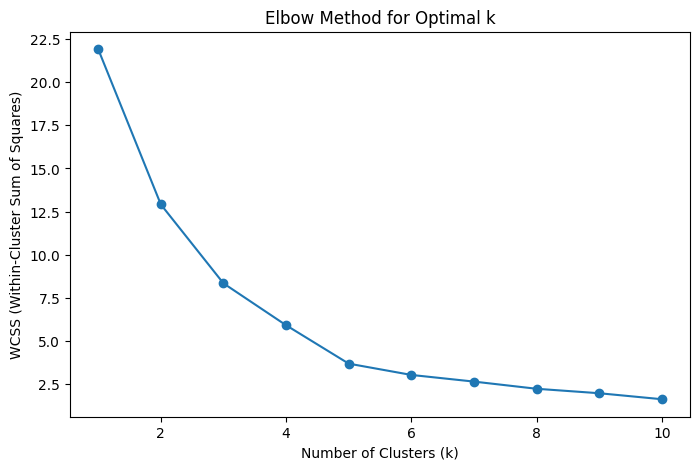

In [375]:
features_for_clustering = ['Income', 'Spending Score']
x= df_clean_copy[features_for_clustering]
wcss = []  # Within-Cluster Sum of Squares

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()



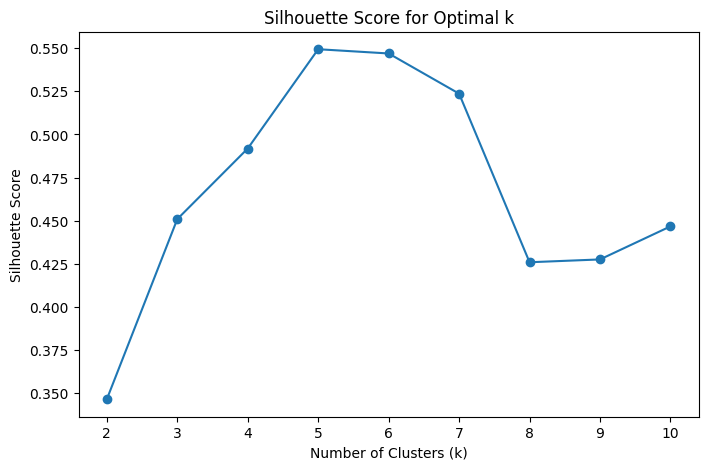

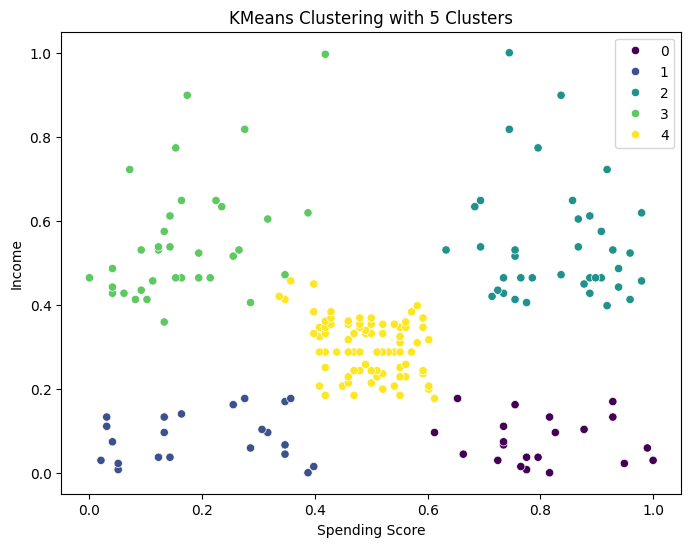

In [376]:
# Step 7: Determine the optimum number of clusters using Silhouette Score
silhouette_scores = []

# Try different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    labels = kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(x, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Step 8: Visualize clustering with the optimal number of clusters
# Choose the value of k based on the Elbow Method or Silhouette Score
optimal_k = 5  # Adjust based on the analysis from the Elbow Method or Silhouette Score

# Fit KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
labels_optimal = kmeans_optimal.fit_predict(x)

# Visualize the clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Spending Score', y='Income', data=df_clean_copy, hue=labels_optimal, palette='viridis')
plt.title(f'KMeans Clustering with {optimal_k} Clusters')
plt.xlabel('Spending Score')
plt.ylabel('Income')
plt.show()

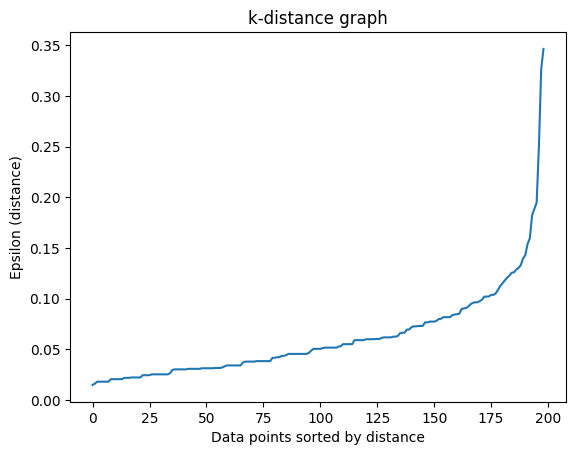

In [377]:


# Assuming X is your standardized data
neighbors = NearestNeighbors(n_neighbors=5)  # You can adjust the value of n_neighbors
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

# Sort the distances and plot the k-distance graph
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Data points sorted by distance")
plt.ylabel("Epsilon (distance)")
plt.show()

# to know the optimum value of eps i have used k distance graph and to see the optimum no of cluster i used k means and silhoutte score

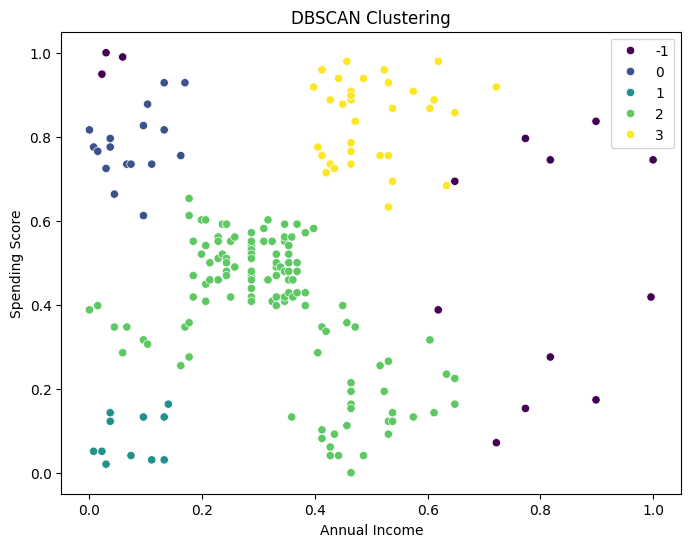

In [378]:


# Step 6: Fit the DBSCAN model
# Adjust parameters such as epsilon (eps) and min_samples based on your data
dbscan_model = DBSCAN(eps=.1, min_samples=5)
clusters = dbscan_model.fit_predict(x)

# Step 7: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Spending Score', data=df_clean_copy, hue=clusters, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [379]:
features_for_clustering = ['Income', 'Age', 'Spending Score']
y= df_clean_copy[features_for_clustering]

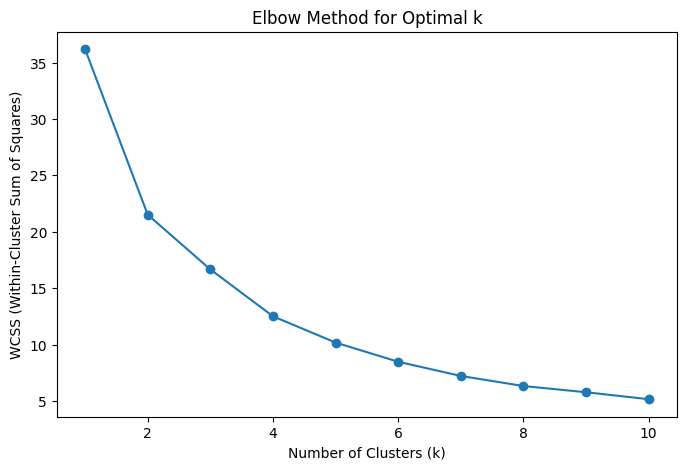

In [380]:

wcss = []  # Within-Cluster Sum of Squares

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(y)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

Text(0.5, 0.92, 'DBSCAN Clustering in 3D')

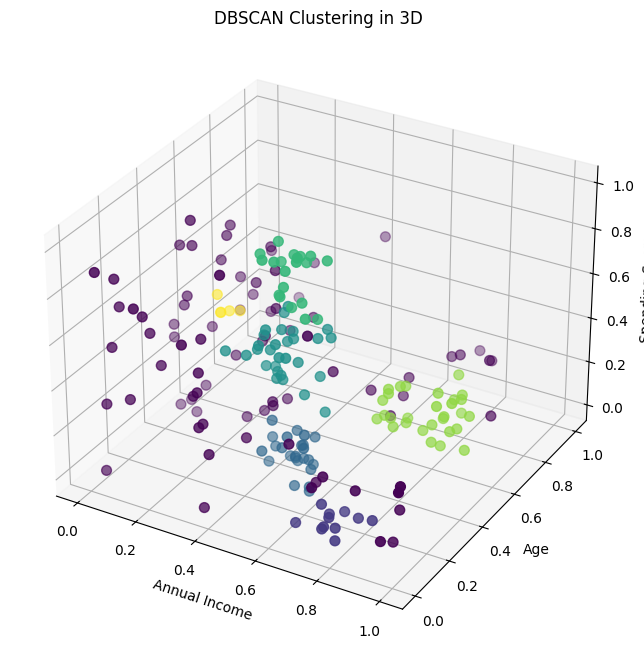

In [381]:

# Step 6: Fit the DBSCAN model
# Adjust parameters such as epsilon (eps) and min_samples based on your data
# Adjust parameters such as epsilon (eps) and min_samples based on your data
dbscan_model = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan_model.fit_predict(y)

# Step 7: Visualize clustering with DBSCAN in 3D
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y['Spending Score'], y['Income'], y['Age'], c=labels, cmap='viridis', s=50)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score')
ax.set_title('DBSCAN Clustering in 3D')
